# Combining datasets

In [209]:
# from bioinfokit import analys, visuz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

---
### 1. Kuehn et al. (2024)

RNASeq analysis for EBV-immortalized B-cells from individuals with an AIOLOS E82K mutation (n=4) and healthy controls (n=3)
- *kuehn_data/GSE242931_genematrix.txt*

We are interested in EBV-immortalized B cells from healthy controls only. 

"We used reference **genome hg19**, and all files necessary for analysis were taken from the platform/resource **UCSC Genome Browser** (University of California, Santa Cruz, USA)."

---
### 2. Wiggins 

RNASeq analysis for Christine's B cell experiments.
- *wiggins_data/4h_complete_counts_matrix.csv*

We are interested in unstimulated, immortalized B cells only.

---
### 3. Longo et al. (2009)

CD19+ B cells were sorted using flow cytometry, sequenced using Affymetrix HG-U133 Plus 2.0.

The following file is the output of longo_processing.Rmd, which maps the Affymetric probe IDs to ENSEMBL IDs using biomaRt. TODO: also consider incorporating jetset in R
- *longo_data/GSE12366_genematrix.txt*

In [210]:
# load kuehn et al. RNAseq data
kuehn_df = pd.read_csv('../kuehn_data/GSE242931_genematrix.txt', delimiter='\t', header=0)
kuehn_df.rename(columns = {list(kuehn_df)[0]: 'gene_ensembl'}, inplace = True)
kuehn_df.head()

,gene_ensembl,HC1_1,HC2_1,HC3_1,B.I.1_1,B.II.2_1,C.II.1_1,C.III.1_1,HC1_2,HC2_2,HC3_2,B.I.1_2,B.II.2_2,C.II.1_2,C.III.1_2
0,ENSG00000279457,17,6,8,5,12,4,6,12,10,6,17,3,12,3
1,ENSG00000225630,1134,1195,657,1223,671,2475,1992,1199,790,750,974,536,2189,794
2,ENSG00000237973,88,79,37,98,57,40,32,71,44,25,66,44,42,28
3,ENSG00000229344,25,20,23,20,2,21,9,35,21,25,29,18,15,5
4,ENSG00000248527,6605,6262,4856,6234,3118,5544,4551,8658,3438,4987,5283,3060,4876,1557


In [211]:
# remove weird spaces in column names
kuehn_df.rename(columns=lambda x: x.strip(), inplace=True)
kuehn_df.columns

Index(['gene_ensembl', 'HC1_1', 'HC2_1', 'HC3_1', 'B.I.1_1', 'B.II.2_1',
       'C.II.1_1', 'C.III.1_1', 'HC1_2', 'HC2_2', 'HC3_2', 'B.I.1_2',
       'B.II.2_2', 'C.II.1_2', 'C.III.1_2'],
      dtype='object')

In [212]:
kuehn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15870 entries, 0 to 15869
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   gene_ensembl  15870 non-null  object
 1   HC1_1         15870 non-null  int64 
 2   HC2_1         15870 non-null  int64 
 3   HC3_1         15870 non-null  int64 
 4   B.I.1_1       15870 non-null  int64 
 5   B.II.2_1      15870 non-null  int64 
 6   C.II.1_1      15870 non-null  int64 
 7   C.III.1_1     15870 non-null  int64 
 8   HC1_2         15870 non-null  int64 
 9   HC2_2         15870 non-null  int64 
 10  HC3_2         15870 non-null  int64 
 11  B.I.1_2       15870 non-null  int64 
 12  B.II.2_2      15870 non-null  int64 
 13  C.II.1_2      15870 non-null  int64 
 14  C.III.1_2     15870 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 1.8+ MB


In [213]:
healthy_controls = kuehn_df.filter(like='HC').columns
kuehn_df = kuehn_df.loc[:, ['gene_ensembl'] + list(healthy_controls)]
kuehn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15870 entries, 0 to 15869
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   gene_ensembl  15870 non-null  object
 1   HC1_1         15870 non-null  int64 
 2   HC2_1         15870 non-null  int64 
 3   HC3_1         15870 non-null  int64 
 4   HC1_2         15870 non-null  int64 
 5   HC2_2         15870 non-null  int64 
 6   HC3_2         15870 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 868.0+ KB


---
### Wiggins 

RNASeq analysis for Christine's B cell experiments.
- *wiggins_data/4h_complete_counts_matrix.csv*

We are interested in unstimulated, immortalized B cells only.


In [214]:
# load wiggins RNAseq data
wiggins_df = pd.read_csv('../wiggins_data/4h_complete_counts_matrix.csv', delimiter=',', header=0)
wiggins_df.rename(columns = {list(wiggins_df)[0]: 'gene_ensembl'}, inplace = True)
wiggins_df.head()

,gene_ensembl,10A_1_IL10hi,10A_1_IL10lo,10A_1_IL4hi,10A_1_IL4lo,10A_1_IL6hi,10A_1_IL6lo,10A_2_IL10hi,10A_2_IL10lo,10A_2_IL4hi,...,9F_1_BAFFhi_BCR,9F_1_BAFFlo_BCR,9F_1_unstimA_BCR,9F_1_unstimB_BCR,9F_2_APRILhi_BCR,9F_2_APRILlo_BCR,9F_2_BAFFhi_BCR,9F_2_BAFFlo_BCR,9F_2_unstimA_BCR,9F_2_unstimB_BCR
0,ENSG00000000003,2,1,1,0,0,0,2,0,2,...,0,0,0,1,1,0,1,2,1,0
1,ENSG00000000005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSG00000000419,284,303,395,317,550,556,285,257,441,...,380,846,609,784,756,738,879,752,921,791
3,ENSG00000000457,120,135,128,104,185,205,83,68,109,...,139,299,223,259,234,205,208,186,253,209
4,ENSG00000000460,26,45,34,25,52,65,34,20,34,...,39,94,59,74,71,71,56,48,75,64


In [215]:
wiggins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62663 entries, 0 to 62662
Columns: 281 entries, gene_ensembl to 9F_2_unstimB_BCR
dtypes: int64(280), object(1)
memory usage: 134.3+ MB


In [217]:
# isolate gene_ensembl column and columns that contain 'unstim'
unstim = wiggins_df.filter(like='unstim').columns
wiggins_df = wiggins_df.loc[:, ['gene_ensembl'] + list(unstim)]
wiggins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62663 entries, 0 to 62662
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gene_ensembl       62663 non-null  object
 1   10C_1_unstimA      62663 non-null  int64 
 2   10C_1_unstimB      62663 non-null  int64 
 3   10C_2_unstimA      62663 non-null  int64 
 4   10C_2_unstimB      62663 non-null  int64 
 5   10F_1_unstimA_BCR  62663 non-null  int64 
 6   10F_1_unstimB_BCR  62663 non-null  int64 
 7   10F_2_unstimA_BCR  62663 non-null  int64 
 8   10F_2_unstimB_BCR  62663 non-null  int64 
 9   11C_1_unstimA      62663 non-null  int64 
 10  11C_1_unstimB      62663 non-null  int64 
 11  11C_2_unstimA      62663 non-null  int64 
 12  11C_2_unstimB      62663 non-null  int64 
 13  11F_1_unstimA_BCR  62663 non-null  int64 
 14  11F_1_unstimB_BCR  62663 non-null  int64 
 15  11F_2_unstimA_BCR  62663 non-null  int64 
 16  11F_2_unstimB_BCR  62663 non-null  int64

---

In [312]:
# load longo et al. RNAseq data
longo_df = pd.read_csv('../longo_data/GSE12366_genematrix.txt', delimiter=',')
longo_df = longo_df.reset_index()
longo_df.rename(columns = {
    'index': 'gene_ensembl',
    'GSM310429.CEL': 'GC_40',
    'GSM310430.CEL': 'GC_43',
    'GSM310431.CEL': 'GC_50',
    'GSM310432.CEL': 'PC_30',
    'GSM310433.CEL': 'PC_33',
    'GSM310434.CEL': 'PC_44',
    'GSM310435.CEL': 'Naive_39',
    'GSM310436.CEL': 'Naive_41',
    'GSM310437.CEL': 'Naive_48',
    'GSM310438.CEL': 'MM_28',
    'GSM310439.CEL': 'MM_36',
    'GSM310440.CEL': 'MM_38'
    }, 
    inplace=True)
longo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37791 entries, 0 to 37790
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gene_ensembl  37791 non-null  object 
 1   GC_40         37791 non-null  float64
 2   GC_43         37791 non-null  float64
 3   GC_50         37791 non-null  float64
 4   PC_30         37791 non-null  float64
 5   PC_33         37791 non-null  float64
 6   PC_44         37791 non-null  float64
 7   Naive_39      37791 non-null  float64
 8   Naive_41      37791 non-null  float64
 9   Naive_48      37791 non-null  float64
 10  MM_28         37791 non-null  float64
 11  MM_36         37791 non-null  float64
 12  MM_38         37791 non-null  float64
dtypes: float64(12), object(1)
memory usage: 3.7+ MB


In [356]:
longo_df[longo_df.duplicated(subset='gene_ensembl')]

,gene_ensembl,GC_40,GC_43,GC_50,PC_30,PC_33,PC_44,Naive_39,Naive_41,Naive_48,MM_28,MM_36,MM_38
11,ENSG00000100030,6.412756,6.427207,6.262102,4.812015,4.202156,4.672303,7.066771,6.780903,6.548064,5.955180,6.715913,6.429159
14,ENSG00000212123,3.390219,3.233551,3.035190,3.278859,3.186728,3.148235,3.496275,3.458477,3.236882,3.396457,3.280097,3.266289
16,ENSG00000168297,8.175836,8.416906,8.485917,6.094873,6.056866,6.820195,7.542947,8.304887,7.230884,7.464279,8.157740,7.725875
20,ENSG00000076351,4.102209,4.346639,3.852158,4.314512,4.365688,5.097663,4.308506,4.351251,4.002523,4.405171,4.057009,3.954782
26,ENSG00000160161,2.835253,3.042119,2.705705,2.839045,3.160224,3.084402,3.146837,3.226169,2.663851,2.826900,2.845657,2.996206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37786,ENSG00000111640,12.842390,13.000050,13.045442,11.361271,10.964785,11.188526,11.562985,11.186968,11.465366,11.140995,11.843036,12.025037
37787,ENSG00000115415,6.280053,6.262618,6.416780,7.827658,7.649014,7.216359,8.078035,7.985044,8.602622,7.793947,9.039089,8.302766
37788,ENSG00000115415,2.761679,2.890682,2.375257,2.677668,2.585577,2.848988,3.257857,2.712186,2.580075,2.652094,3.995921,2.907443
37789,ENSG00000115415,5.405081,5.464478,5.052249,5.765518,5.571516,5.848554,6.704565,5.996053,5.500366,5.951405,7.174680,6.150542


In [363]:
longo_df[longo_df['gene_ensembl'] == 'ENSG00000115415']

,gene_ensembl,GC_40,GC_43,GC_50,PC_30,PC_33,PC_44,Naive_39,Naive_41,Naive_48,MM_28,MM_36,MM_38
6553,ENSG00000115415,6.720799,6.381279,6.907865,8.379129,8.146959,7.946171,8.911028,8.556941,9.136732,8.511007,9.441556,8.992911
14114,ENSG00000115415,4.378011,4.192788,4.439128,5.388037,5.380174,5.206247,6.315818,5.710337,6.797564,5.724756,6.980143,6.249260
30684,ENSG00000115415,3.995005,3.406724,3.432792,3.509438,3.954575,3.958375,4.521751,4.300215,4.946944,4.747792,4.933356,5.133723
37787,ENSG00000115415,6.280053,6.262618,6.416780,7.827658,7.649014,7.216359,8.078035,7.985044,8.602622,7.793947,9.039089,8.302766
37788,ENSG00000115415,2.761679,2.890682,2.375257,2.677668,2.585577,2.848988,3.257857,2.712186,2.580075,2.652094,3.995921,2.907443
37789,ENSG00000115415,5.405081,5.464478,5.052249,5.765518,5.571516,5.848554,6.704565,5.996053,5.500366,5.951405,7.174680,6.150542
37790,ENSG00000115415,3.866763,3.357927,3.634146,4.769574,4.219807,4.720195,5.128528,4.975156,4.715085,4.427597,6.184986,5.330424


---
### Converting Ensembl gene IDs into gene names

In [218]:
# helper function
def get_ensembl_ids(feature, line, remove_dot=False):

    '''
    Given a line from a genome annotation, returns the requested value. Note that this function 
        is pretty specific for ensembl ID formatting (i.e. separated by "")

    Arguments:  feature => the value you are interested in extracting, e.g. gene_symbol
                line => line from genome annotation file
                remove_dot => when true, removes '.x_y' appended to end of features

    Return:    value of the feature you extracted
    '''

    # some files have e.g. .1_1 appended to  gene id
    if remove_dot:
        return line.split(feature)[1].split('"')[1].split('.')[0]

    return line.split(feature)[1].split('"')[1]

In [219]:
# load ucsc annotations
with open('../annotations/ensemblToGeneName.txt') as file: # contains ensembl transcript ids and gene names
    ensemblToGeneName = list(file)

with open('../annotations/hg19.ensGene.gtf') as file: # contains ensembl transcript ids and gene ids
    ensGene = list(file)

with open('../annotations/ensemblSource.txt') as file:
    ensemblSource = list(file)

# load gencode comprehensive genome annotation
with open('../annotations/gencode.v46lift37.annotation.gtf') as file: # gencode GrCh37 (hg19) comprehensive genome annotation
    gencode = list(file)[5:] # remove metadata

In [ ]:
# extract ensembl transcript ids and corresponding gene ids
enst_to_ensg = dict(map(lambda x: (get_ensembl_ids('transcript_id', x), get_ensembl_ids('gene_id', x)), ensGene))

# extract ensembl transcript ids and corresponding gene names
enst_to_gene = dict(map(lambda x: x.strip('\n').split('\t'), ensemblToGeneName))

# extract ensembl transcript ids and corresponding gene types
ucsc_enst_to_type = dict(map(lambda x: x.strip('\n').split('\t'), ensemblSource))

# check same length though they don't need to be (if i were to flip enst_to_ensg dictionary keys and values)
len(enst_to_ensg) == len(enst_to_gene) == len(ucsc_enst_to_type)

True

In [221]:
# extract  gene ids and corresponding gene types
gencode_ensg_to_type = dict(
    map(lambda x: (get_ensembl_ids('gene_id', x, remove_dot=True), get_ensembl_ids('gene_type', x, remove_dot=True)), 
        gencode)
        )

In [222]:
# combine enst_to_ensg and enst_to_gene to create dictionary relating gene_id and gene_symbol
keys = list(enst_to_ensg.values())
values = [enst_to_gene[enst] for enst in enst_to_ensg]
ensg_to_gene = dict(zip(keys, values))
ensg_to_gene

# combine enst_to_ensg and enst_to_type to create dictionary relating gene_id and gene_symbol
keys = list(enst_to_ensg.values())
values = [ucsc_enst_to_type[enst] for enst in enst_to_ensg]
ucsc_ensg_to_type = dict(zip(keys, values))
ucsc_ensg_to_type

{'ENSG00000223972': 'transcribed_unprocessed_pseudogene',
 'ENSG00000227232': 'unprocessed_pseudogene',
 'ENSG00000243485': 'miRNA',
 'ENSG00000237613': 'lincRNA',
 'ENSG00000268020': 'unprocessed_pseudogene',
 'ENSG00000240361': 'unprocessed_pseudogene',
 'ENSG00000186092': 'protein_coding',
 'ENSG00000238009': 'lincRNA',
 'ENSG00000239945': 'lincRNA',
 'ENSG00000233750': 'processed_pseudogene',
 'ENSG00000237683': 'protein_coding',
 'ENSG00000268903': 'processed_pseudogene',
 'ENSG00000269981': 'processed_pseudogene',
 'ENSG00000239906': 'antisense',
 'ENSG00000241860': 'lincRNA',
 'ENSG00000222623': 'snRNA',
 'ENSG00000241599': 'lincRNA',
 'ENSG00000228463': 'lincRNA',
 'ENSG00000241670': 'processed_pseudogene',
 'ENSG00000237094': 'lincRNA',
 'ENSG00000250575': 'unprocessed_pseudogene',
 'ENSG00000233653': 'processed_pseudogene',
 'ENSG00000224813': 'transcribed_unprocessed_pseudogene',
 'ENSG00000235249': 'protein_coding',
 'ENSG00000269732': 'processed_pseudogene',
 'ENSG00000256

In [223]:
print('gencode ensg_to_type length: ', len(gencode_ensg_to_type))
print('ucsc ensg_to_type length: ', len(ucsc_ensg_to_type))

# TODO: take a look at the ones present in both?

gencode ensg_to_type length:  64854
ucsc ensg_to_type length:  60234


In [224]:
kuehn_df.insert(1, 'gene_symbol', kuehn_df['gene_ensembl'].map(ensg_to_gene))
wiggins_df.insert(1, 'gene_symbol', wiggins_df['gene_ensembl'].map(ensg_to_gene))

# if use ucsc_ensg_to_type, all missing gene_symbol will also have missing gene_type
kuehn_df.insert(2, 'gene_type', kuehn_df['gene_ensembl'].map(gencode_ensg_to_type))
wiggins_df.insert(2, 'gene_type', wiggins_df['gene_ensembl'].map(gencode_ensg_to_type)) 

In [225]:
kuehn_missing = kuehn_df['gene_type'][kuehn_df['gene_symbol'].isnull()]
wiggins_missing = wiggins_df['gene_type'][wiggins_df['gene_symbol'].isnull()]
print('# of missing genes in kuehn dataset: ', len(kuehn_missing))
print('# of missing genes in wiggins dataset: ', len(wiggins_missing))

# of missing genes in kuehn dataset:  561
# of missing genes in wiggins dataset:  10703


In [226]:
# the gene_types that I am able to identify for entries with missing gene_symbol for their
#   given gene_ensembl ID
kuehn_missing[kuehn_missing.notnull()].value_counts()

gene_type
lncRNA                                184
protein_coding                        144
TEC                                    86
transcribed_unprocessed_pseudogene     19
processed_pseudogene                   14
unprocessed_pseudogene                  7
artifact                                6
transcribed_processed_pseudogene        5
IG_V_gene                               4
transcribed_unitary_pseudogene          1
TR_C_gene                               1
IG_V_pseudogene                         1
snoRNA                                  1
Name: count, dtype: int64

In [227]:
# the gene_types that i am able to identify for entries with missing gene_symbol for their
#   given gene_ensembl ID
wiggins_missing[wiggins_missing.notnull()].value_counts()

gene_type
lncRNA                                5858
TEC                                   1029
protein_coding                         771
unprocessed_pseudogene                 493
processed_pseudogene                   428
transcribed_unprocessed_pseudogene     150
transcribed_processed_pseudogene        34
unitary_pseudogene                      29
artifact                                19
transcribed_unitary_pseudogene          17
IG_V_pseudogene                         13
rRNA_pseudogene                         13
IG_V_gene                                9
IG_D_gene                                4
TR_J_gene                                2
TR_V_gene                                2
snRNA                                    2
snoRNA                                   1
ribozyme                                 1
TR_C_gene                                1
TR_D_gene                                1
IG_pseudogene                            1
translated_processed_pseudogene          1
N

#### ^ gene / transcript biotype descriptions for gencode genes found [here](https://www.gencodegenes.org/pages/biotypes.html)

---
### Merging the datasets via taking the intersection of Ensembl IDs

In [228]:
# columns we are interested in merging for final heatmap dataset
kuehn_cols = ['gene_ensembl', 'gene_symbol'] + list(kuehn_df.select_dtypes(include=np.number).columns)
wiggins_cols = ['gene_ensembl'] + list(wiggins_df.select_dtypes(include=np.number).columns)

# merge kuehn and wiggins data based on intersection of gene_ensembl 
df = kuehn_df[kuehn_cols].merge(wiggins_df[wiggins_cols], how='inner', on='gene_ensembl')
df

,gene_ensembl,gene_symbol,HC1_1,HC2_1,HC3_1,HC1_2,HC2_2,HC3_2,10C_1_unstimA,10C_1_unstimB,...,12F_1_unstimB_BCR,12F_2_unstimA_BCR,9C_1_unstimA,9C_1_unstimB,9C_2_unstimA,9C_2_unstimB,9F_1_unstimA_BCR,9F_1_unstimB_BCR,9F_2_unstimA_BCR,9F_2_unstimB_BCR
0,ENSG00000279457,NaN,17,6,8,12,10,6,11,13,...,18,15,12,5,16,13,12,17,25,17
1,ENSG00000225630,MTND2P28,1134,1195,657,1199,790,750,551,1254,...,644,310,1419,732,1122,783,1431,1842,1403,1149
2,ENSG00000237973,hsa-mir-6723,88,79,37,71,44,25,204,586,...,289,105,164,76,193,94,126,146,153,130
3,ENSG00000229344,RP5-857K21.7,25,20,23,35,21,25,3,4,...,1,1,6,3,2,0,5,1,5,3
4,ENSG00000248527,MTATP6P1,6605,6262,4856,8658,3438,4987,2300,5593,...,4087,2572,6625,2740,5389,3666,6056,8506,7693,5509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15734,ENSG00000182362,YBEY,363,343,156,357,164,122,89,248,...,220,110,209,106,203,122,196,352,194,146
15735,ENSG00000160298,C21orf58,392,121,144,309,162,160,11,51,...,41,53,53,21,84,56,43,51,70,67
15736,ENSG00000160299,PCNT,4416,2832,2179,3770,2339,1810,218,644,...,687,901,548,317,970,682,463,637,1020,821
15737,ENSG00000160305,DIP2A,848,565,396,839,520,385,155,427,...,479,550,334,211,486,355,305,454,714,598


---
### Removing the genes we do not care about
TODO: for now, just remove the nones. but come back to look at those later!

In [229]:
# remove entries where gene_symbol is missing
df = df[df['gene_symbol'].notnull()]
df 

,gene_ensembl,gene_symbol,HC1_1,HC2_1,HC3_1,HC1_2,HC2_2,HC3_2,10C_1_unstimA,10C_1_unstimB,...,12F_1_unstimB_BCR,12F_2_unstimA_BCR,9C_1_unstimA,9C_1_unstimB,9C_2_unstimA,9C_2_unstimB,9F_1_unstimA_BCR,9F_1_unstimB_BCR,9F_2_unstimA_BCR,9F_2_unstimB_BCR
1,ENSG00000225630,MTND2P28,1134,1195,657,1199,790,750,551,1254,...,644,310,1419,732,1122,783,1431,1842,1403,1149
2,ENSG00000237973,hsa-mir-6723,88,79,37,71,44,25,204,586,...,289,105,164,76,193,94,126,146,153,130
3,ENSG00000229344,RP5-857K21.7,25,20,23,35,21,25,3,4,...,1,1,6,3,2,0,5,1,5,3
4,ENSG00000248527,MTATP6P1,6605,6262,4856,8658,3438,4987,2300,5593,...,4087,2572,6625,2740,5389,3666,6056,8506,7693,5509
5,ENSG00000198744,RP5-857K21.11,34,21,10,22,3,5,4,5,...,13,5,4,0,1,2,2,4,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15734,ENSG00000182362,YBEY,363,343,156,357,164,122,89,248,...,220,110,209,106,203,122,196,352,194,146
15735,ENSG00000160298,C21orf58,392,121,144,309,162,160,11,51,...,41,53,53,21,84,56,43,51,70,67
15736,ENSG00000160299,PCNT,4416,2832,2179,3770,2339,1810,218,644,...,687,901,548,317,970,682,463,637,1020,821
15737,ENSG00000160305,DIP2A,848,565,396,839,520,385,155,427,...,479,550,334,211,486,355,305,454,714,598


### Filtering out mitochondrial and ribosomal genes, where:
- 'MT' => transcribed from the mitochondrial genome
- 'RPL' => L ribosomal protein
- 'RPS' => S ribosomal protein
- 'MRP' => mitochondrial ribosomal protein

sources: [mitochondrial](https://www.genenames.org/data/genegroup/#!/group/1975) and [ribosomal](https://www.genenames.org/data/genegroup/#!/group/1054) gene names (HUGO gene nomenclature committee)

In [230]:
df = df[~df['gene_symbol'].str.startswith(("MT", 'RPL', 'RPS', 'MRP'))]

### Narrowing down to B cell-related genes:

- [B cell receptor signaling pathway](https://amigo.geneontology.org/amigo/term/GO:0050853?relation=regulates)
- TODO: add many more obviously

In [231]:
with open('../annotations/BCR_signaling.txt') as file:
    BCR_file = list(file)
    BCR_genes = list(map(lambda x: x.split('\t')[1], BCR_file)) # list of genes related to BCR signaling

In [232]:
# select only genes found in above lists
df = df[df['gene_symbol'].isin(BCR_genes)]

In [233]:
# NOTE: various isoforms of each gene
df['gene_symbol'].value_counts()

gene_symbol
PIK3CD     1
CD19       1
PLEKHA1    1
PTPN6      1
NCKAP1L    1
          ..
LYN        1
CD72       1
SYK        1
ABL1       1
NFAM1      1
Name: count, Length: 67, dtype: int64

### how i decided to deal with the above: (TODO)

perform analysis on the unique ensembl IDs, then just plot gene_names at the end for human interpretation. inspiration from [here](https://support.bioconductor.org/p/90185/) and [here](https://www.biostars.org/p/9479055/) and [here](https://bioinformatics.stackexchange.com/questions/5281/how-to-deal-with-duplicate-genes-having-different-expression-values)

---
### Determining which genes are interesting to examine (TODO)

---
### Plotting differential gene expression heatmap

In [234]:
# this is what we are hoping to get information from, since combining datasets
# zscore across gene expression profile for each sample with ddof = 1 default for sp.stats.zscore
zscored_df = df.copy()
numeric = df.select_dtypes(include=np.number)
zscored_df[numeric.columns] = numeric.apply(sp.stats.zscore, axis=0, ddof=1)
zscored_df

,gene_ensembl,gene_symbol,HC1_1,HC2_1,HC3_1,HC1_2,HC2_2,HC3_2,10C_1_unstimA,10C_1_unstimB,...,12F_1_unstimB_BCR,12F_2_unstimA_BCR,9C_1_unstimA,9C_1_unstimB,9C_2_unstimA,9C_2_unstimB,9F_1_unstimA_BCR,9F_1_unstimB_BCR,9F_2_unstimA_BCR,9F_2_unstimB_BCR
107,ENSG00000171608,PIK3CD,0.682634,-0.112334,0.781206,0.601229,-0.071218,0.751114,-0.031608,0.076085,...,0.129133,0.107169,0.012559,0.015852,-0.119258,-0.097634,0.095595,0.129387,0.075308,0.026923
348,ENSG00000182866,LCK,0.031728,-0.138703,-0.295193,0.024983,-0.119991,-0.305862,-0.313395,-0.348197,...,-0.260952,-0.288528,-0.363448,-0.345713,-0.338725,-0.345138,-0.392436,-0.372846,-0.342431,-0.357840
760,ENSG00000134215,VAV3,-0.568884,-0.268660,-0.505122,-0.594509,-0.226635,-0.506890,-0.347811,-0.379310,...,-0.278710,-0.297334,-0.395826,-0.380160,-0.358654,-0.365924,-0.409769,-0.399431,-0.354614,-0.370942
830,ENSG00000134242,PTPN22,-0.418731,-0.221022,-0.359787,-0.413616,-0.192115,-0.339805,-0.310168,-0.352572,...,-0.273929,-0.296076,-0.355181,-0.329873,-0.340750,-0.351031,-0.354880,-0.350735,-0.347485,-0.361770
1113,ENSG00000160856,FCRL3,-0.568009,-0.263600,-0.505363,-0.594025,-0.223451,-0.506890,-0.275034,-0.315747,...,-0.247683,-0.287018,-0.232830,-0.262739,-0.290926,-0.259530,-0.338895,-0.350208,-0.339904,-0.326941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14780,ENSG00000105369,CD79A,0.191648,-0.061281,0.095743,0.146171,-0.055752,0.153556,0.175251,0.349055,...,0.171772,0.010384,0.430451,0.306260,0.171664,0.215014,0.207684,0.226385,0.004647,0.045047
14927,ENSG00000087088,BAX,-0.227177,-0.210819,-0.294711,-0.274678,-0.177912,-0.317177,-0.152066,-0.213657,...,-0.128842,-0.207510,-0.188878,-0.178508,-0.241994,-0.256530,-0.144954,-0.135154,-0.190009,-0.244289
15244,ENSG00000100030,MAPK1,-0.029791,-0.201645,0.168772,0.037893,-0.173465,0.190393,-0.278619,-0.303472,...,-0.241536,-0.271334,-0.304064,-0.295174,-0.282987,-0.280209,-0.320791,-0.322833,-0.312109,-0.299645
15278,ENSG00000211679,IGLC3,-0.568884,-0.268866,-0.495963,-0.594832,-0.226685,-0.498470,-0.191502,-0.152281,...,-0.198898,-0.166414,-0.251431,-0.178257,-0.211047,-0.250422,-0.241828,-0.221492,-0.110956,-0.200725


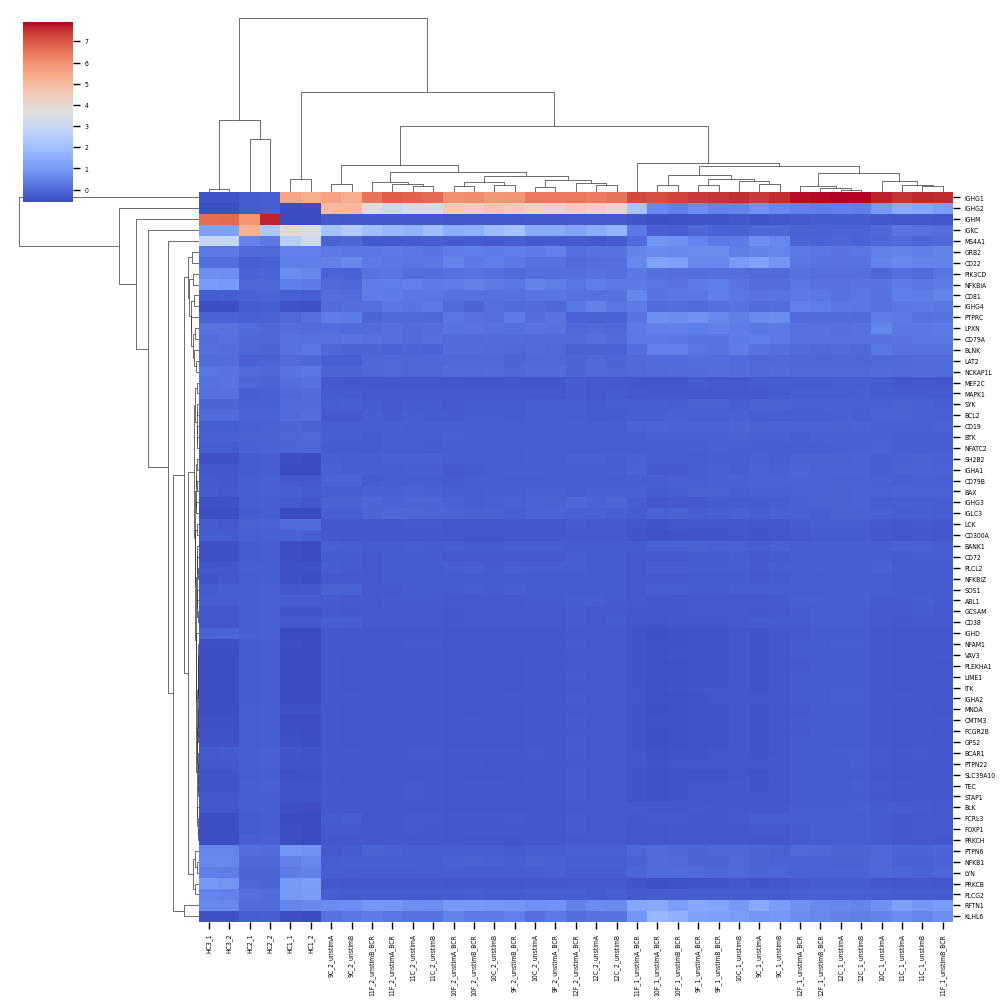

In [235]:
# TODO rip what happened...
# zscored across genes per sample
sns.set_context('paper', font_scale = 0.5) # TODO this font is too small, but there are just too many genes lol. maybe figure out how to choose which ones?
sns.clustermap(zscored_df.select_dtypes(include=np.number), 
               xticklabels=numeric.columns, 
               yticklabels=zscored_df['gene_symbol'],
               cmap='coolwarm')

---
### Workshopping stuff *LITERALLY AVERT YOUR EYES*

In [236]:
# check that sp.stats.zscore is doing what we want
means = df.select_dtypes(include=np.number).mean()
stddevs = df.select_dtypes(include=np.number).std(ddof=1)
zscored_manual = (df.select_dtypes(include=np.number) - means) / stddevs

if np.allclose(zscored_df.select_dtypes(include=np.number), zscored_manual, rtol=1e-9, atol=1e-12):
    print("the columns are equal within the tolerance")
else:
    print("the columns are NOT equal")

the columns are equal within the tolerance


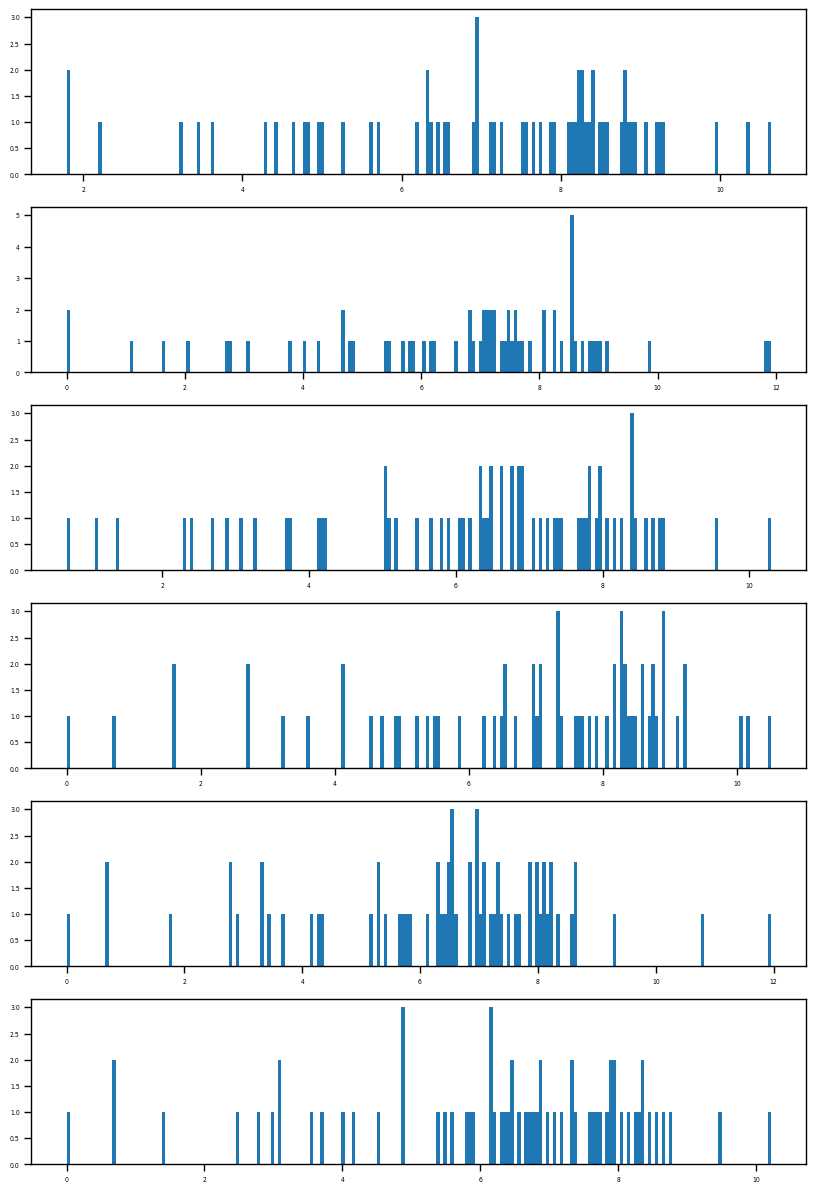

In [237]:
# ln-scale plots of raw transcript counts excluding 0 counts TODO: figure out how to incorporate 0 transcript counts
fig, axs = plt.subplots(6, 1, figsize=(10, 15))

# TODO: plot all together?
for (idx, col) in enumerate(df.select_dtypes(include=np.number).columns):
    if idx > 5:
        break
    axs[idx].hist(np.log(df.loc[df[col] != 0, col]), bins=200)

# TODO: label plot

/Users/juliazhong/anaconda3/envs/DAL/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


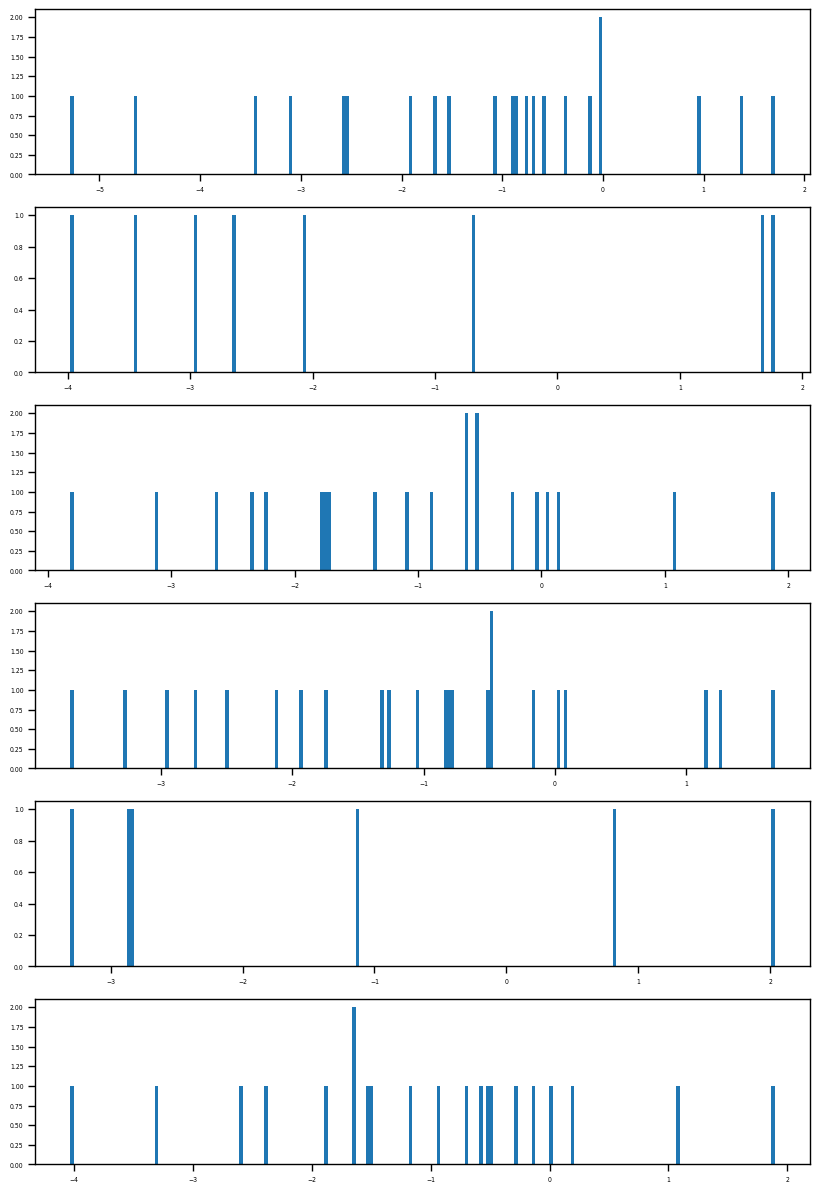

In [238]:
# z-scored transcript plots (yuck) TODO: negative values are NaN, just excluded
fig, axs = plt.subplots(6, 1, figsize=(10, 15))

for (idx, col) in enumerate(zscored_df.select_dtypes(include=np.number).columns):
    if idx > 5:
        break
    axs[idx].hist(np.log(zscored_df.loc[zscored_df[col] != 0, col]), bins=200)

{'bodies': [<matplotlib.collections.PolyCollection at 0x16e082290>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x341d2fdd0>,
 'cmins': <matplotlib.collections.LineCollection at 0x341d34150>,
 'cbars': <matplotlib.collections.LineCollection at 0x299302590>}

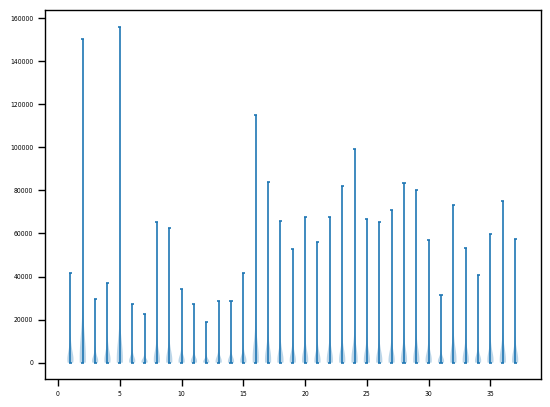

In [239]:
# violin plot of the different samples. so cursed
plt.violinplot(df.select_dtypes(include=np.number))

---
let's take a deeper dive into our zscored dataframe

### notes
- there are high values, but it seems like there may be too many genes crowding this heatmap that you can't indiviually see them, as most values are very low
    - see about making colorbar correspond to deciles, instead of linear range
    - ~~look into mitochondrial and ribosomal genes (they may be very highly expressed and skewing the data)~~
        - ~~there are naming conventions, so can filter out~~
- select which genes are probably interesting to display (B cell genes)
    - gene expression signatures mentioned in the Caesar et al. paper
    - univariate analysis for determining significance gene by gene
- ~~dealing with replicates -> average? and same with repeated gene_names (isoforms)?~~
- ~~names of samples in wiggins_data~~

### things for me:
- still need to figure out how to deal with the .cel data. look into in the morning (though originally i was thinking it would be easier to incorporate it later once i figure this part out. but i think work looking into parsing the data in the morning)
- labeling the different datasets. perhaps a problem for later idk... though it would be nice to have soon
    - should be easy, since i saved the columns corresponding to each dataset as kuehn_cols and wiggins_cols
- do i want to move the mapping  IDs to gene name after putting together the datasets?
    - maybe can leave as is, just in case i wanted to plot stuff for each dataset alone